In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2014-01-01'
end = '2025-03-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2014-01-02,27.593388,27.708162,27.472912,27.651396,73129082
1,2014-01-03,27.392099,27.687835,27.390364,27.639993,66917888
2,2014-01-06,27.697506,27.735680,27.427799,27.590665,71037271
3,2014-01-07,28.231462,28.252039,27.792695,27.887885,102486711
4,2014-01-08,28.290213,28.441179,28.093385,28.408457,90036218
...,...,...,...,...,...,...
2816,2025-03-14,167.619995,168.250000,164.509995,165.315002,18611100
2817,2025-03-17,166.570007,168.460007,165.809998,167.324997,17839100
2818,2025-03-18,162.669998,166.440002,158.800003,165.960007,24616800


In [6]:
ma_100_days = data.Close.rolling(100).mean()

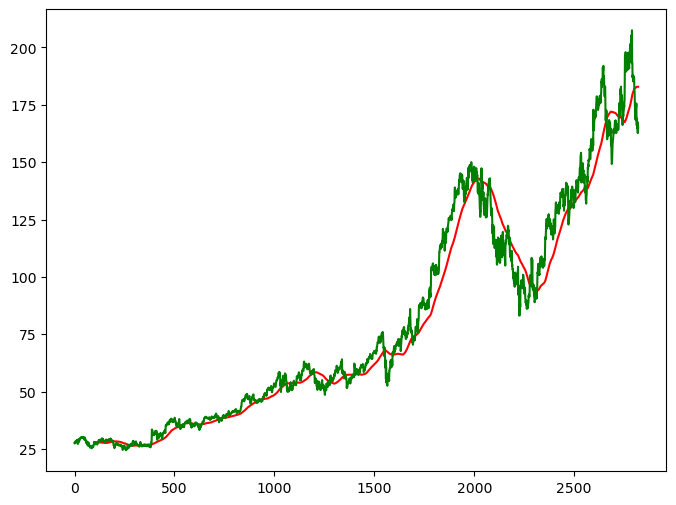

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

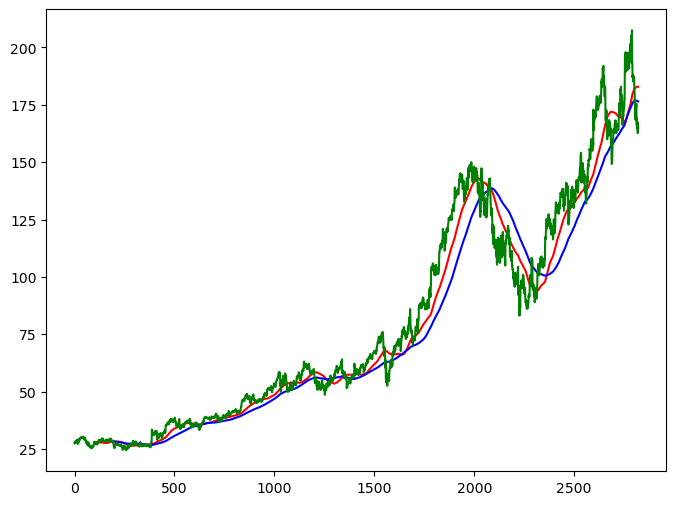

In [13]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [16]:
data.dropna(inplace=True)

In [17]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [18]:
data_train.shape[0]

2256

In [19]:
data_test.shape[0]

565

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [26]:
data_train_scale = scaler.fit_transform(data_train)

In [27]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [28]:
x, y = np.array(x), np.array(y)

In [29]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [30]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [36]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step - loss: 0.0734
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - loss: 0.0067
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - loss: 0.0059
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 0.0061
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - loss: 0.0051
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - loss: 0.0044
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - loss: 0.0042
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - loss: 0.0041
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - loss: 0.0047
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - loss: 0.0041
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - loss: 0.0047
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 0.0038
Epoch 13/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - loss: 0.0037
Epoch 14/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - loss: 0.0040
Epoch 15/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - l

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [45]:
pas_100_days = data_train.tail(100)

In [47]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [49]:
data_test_scale  =  scaler.fit_transform(data_test)

In [51]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [53]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step


In [55]:
scale =1/scaler.scale_

In [57]:
y_predict = y_predict*scale

In [59]:
y = y*scale

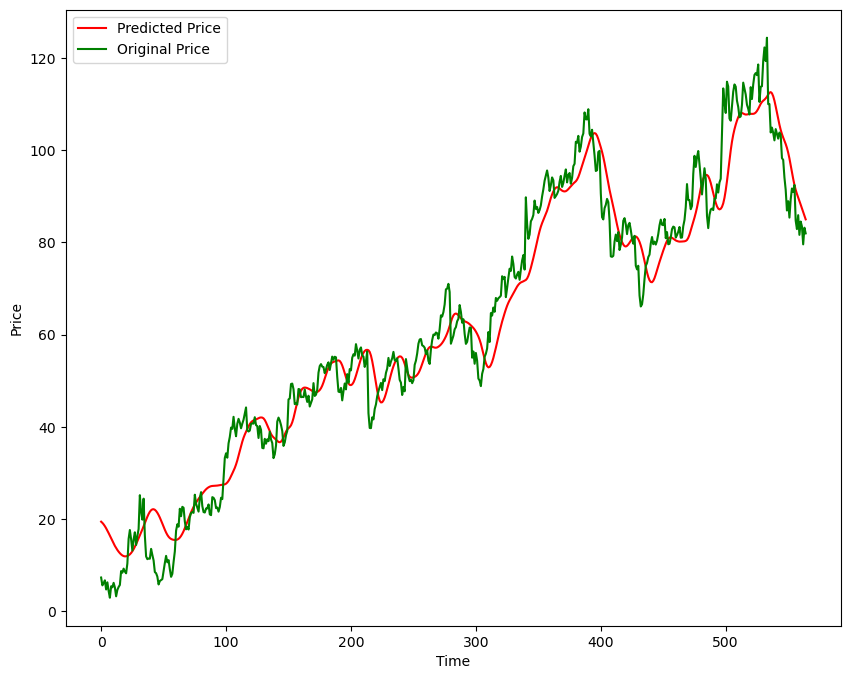

In [61]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [69]:
m = y
z= []
future_days = 30
for i in range(100, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-100:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━

In [70]:
z=np.array(z)
z=scaler.inverse_transform(z.reshape(-1,1))

In [73]:
z

array([[ 9.11448670e+01],
       [ 5.12317824e+01],
       [ 1.43090876e+02],
       [-9.17207589e+01],
       [-3.66142955e+02],
       [-7.32578036e+01],
       [-8.04617920e+02],
       [ 7.40447707e+01],
       [-4.76936760e+02],
       [-1.04650933e+03],
       [ 1.22960296e+02],
       [ 1.52839798e+02],
       [-5.23226226e+02],
       [-2.59014425e+02],
       [ 5.06049966e+01],
       [-2.86685076e+02],
       [-1.22141462e+02],
       [-1.44370589e+02],
       [-3.37025019e+02],
       [-1.30405439e+02],
       [ 2.94889641e+01],
       [-1.46686079e+02],
       [-1.22031654e+02],
       [-1.15390810e+02],
       [-6.76565581e+02],
       [-5.24595640e+02],
       [ 1.78547099e+01],
       [-2.45522608e+01],
       [-9.25478045e+01],
       [ 9.91538503e+01],
       [ 1.38663428e+02],
       [-4.96142188e+02],
       [-8.86785330e+02],
       [-8.28415067e+02],
       [-7.34918407e+02],
       [-1.32471644e+03],
       [-5.24070234e+02],
       [ 8.30568839e+02],
       [-1.2

In [75]:
model.save('Stock Predictions Model.keras')